#  Importing Required Libraries:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Loading the Iris Dataset:

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
# Creating a DataFrame from the dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  


# Splitting the Data:

In [ ]:
X = df.drop(['target', 'target_name'], axis=1)  # Features
y = df['target']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X: The feature variables (sepal length, sepal width, petal length, petal width).
y: The target variable (species of iris).
train_test_split: Splits the data into training (70%) and testing (30%) sets. The random_state=42 ensures that the split is reproducible.

# Training the Decision Tree Model:

In [ ]:
#model = DecisionTreeClassifier(random_state=42)
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

DecisionTreeClassifier: Initializes the Decision Tree model.
fit(): Trains the model using the training data (X_train, y_train).

# Making Predictions:

In [ ]:
y_pred = model.predict(X_test)
#predict(): The trained model predicts the species for the test data (X_test).

# Evaluating the Model:

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
#accuracy_score(): Calculates the accuracy of the model (how many predictions were correct out of total predictions).
#classification_report(): Provides a detailed report of precision, recall, and F1-score for each class.


[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]
Accuracy: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



# Visualizing the Decision Tree:

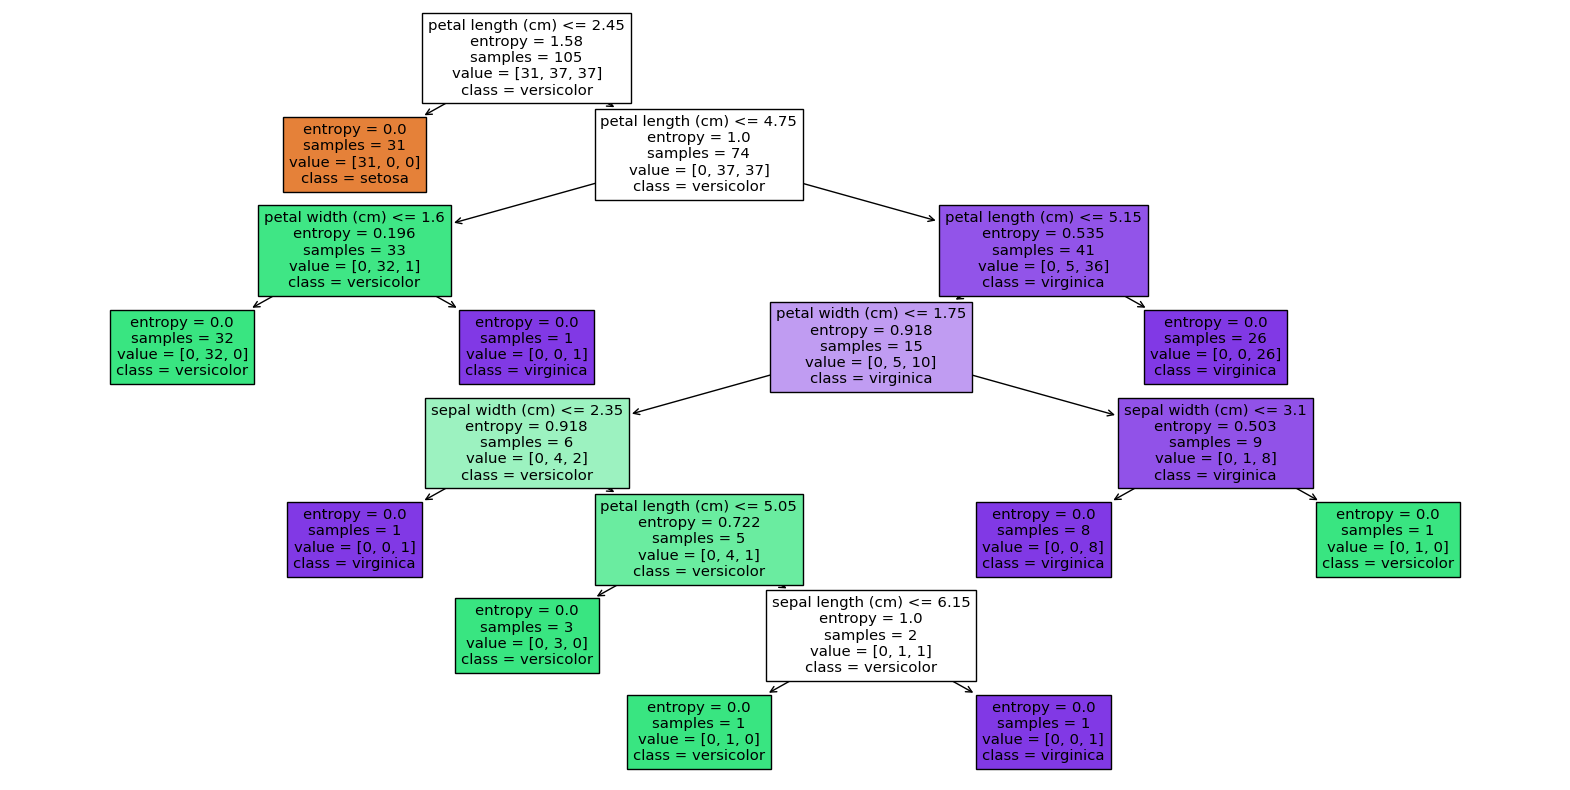

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()
#plot_tree(): Visualizes the Decision Tree structure. The filled=True parameter colors the nodes according to the majority class at each node.
#plt.show(): Displays the Decision Tree plot.